<a href="https://colab.research.google.com/github/Moxa13patel/task-7-SVM/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###importing needed library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("/content/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
#checking missing value
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Step 2: Drop the 'id' column (not useful for prediction)
df = df.drop('id', axis=1)

# Step 3: Encode the 'diagnosis' column ('M' -> 1, 'B' -> 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Step 4: Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

###spliting and testing data

In [9]:
# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the split
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (455, 30)
Test shape: (114, 30)


###train svm with linear and RBF kernel

In [11]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Kernel:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Linear SVM", y_test, y_pred_linear)
evaluate_model("RBF SVM", y_test, y_pred_rbf)


Linear SVM Kernel:
Accuracy: 0.956140350877193
Confusion Matrix:
 [[70  1]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


RBF SVM Kernel:
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[71  0]
 [ 6 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



###visulize SVM decision boundary

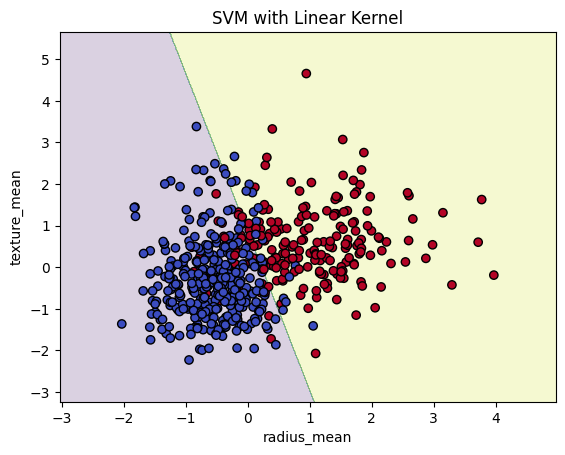

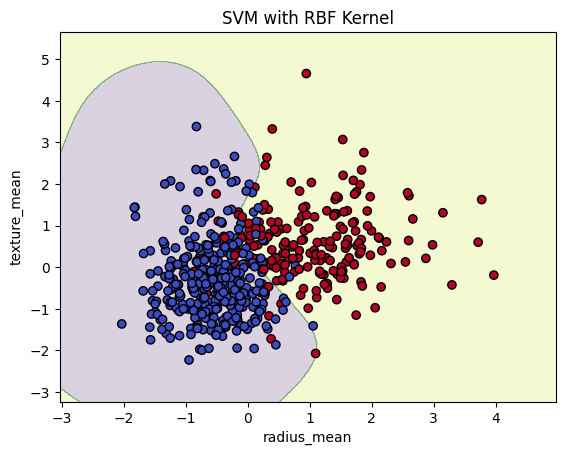

In [13]:

# Use only 2 features (for 2D visualization)
X_2d = df[['radius_mean', 'texture_mean']]
y_2d = df['diagnosis']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Train SVM with Linear and RBF kernel
svm_linear_2d = SVC(kernel='linear')
svm_linear_2d.fit(X_scaled, y_2d)

svm_rbf_2d = SVC(kernel='rbf')
svm_rbf_2d.fit(X_scaled, y_2d)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear_2d, X_scaled, y_2d, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf_2d, X_scaled, y_2d, "SVM with RBF Kernel")


### tune hyperparameters and crossValidation

In [15]:

# Create a pipeline with scaling + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define parameter grid
param_grid = {
    'svm__kernel': ['rbf'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1, 10]
}

#  Apply GridSearchCV with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

#  Print best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9789318428815401
